In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [2]:
a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]
df = pd.DataFrame ({'values': a })
print (df)

    values
0      100
1       80
2       75
3       77
4       89
5       33
6       45
7       25
8       65
9       17
10      30
11      24
12      57
13      55
14      70
15      75
16      65
17      84
18      90
19     150


#### среднее арифметическое (mean)

In [3]:
mean = df['values'].sum() / df['values'].count()
mean

65.3

In [4]:
df['values'].mean()

65.3

#### среднее квадратичное отклонение (std)

In [5]:
std = np.sqrt(((df['values'] - df['values'].mean()) ** 2).sum() / df['values'].count())
std

30.823854398825596

In [6]:
df['values'].std(ddof=0)

30.823854398825596

#### смещенную и несмещенную оценки дисперсий

In [7]:
variance = ((df['values'] - df['values'].mean()) ** 2).sum() / df['values'].count()
variance

950.11

In [8]:
df['values'].var(ddof=0)

950.11

In [9]:
variance2 = ((df['values'] - df['values'].mean())**2).sum() / (df['values'].count() - 1)
variance2

1000.1157894736842

In [10]:
df['values'].var(ddof=1)

1000.1157894736842

### Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [11]:
q1 = df['values'].quantile(0.25)
q3 = df['values'].quantile(0.75)

iqr = q3 - q1

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

(-16.5, 139.5)

In [12]:
outliers = df.loc[(df['values'] < boxplot_range[0]) | (df['values'] > boxplot_range[1])]

outliers.shape[0]

1

<AxesSubplot:>

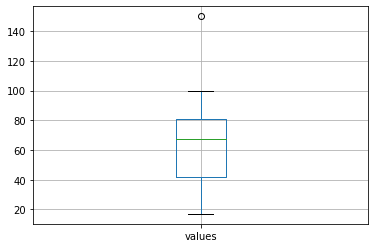

In [13]:
df[['values']].boxplot()

### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [14]:
A = 0.2

In [15]:
B = 0.175

In [16]:
C = 0.225